In [1]:
import cv2
import numpy as np
lena = cv2.imread('data/lena.jpg', cv2.IMREAD_COLOR)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
plt.rc('axes', **{'grid' : False})

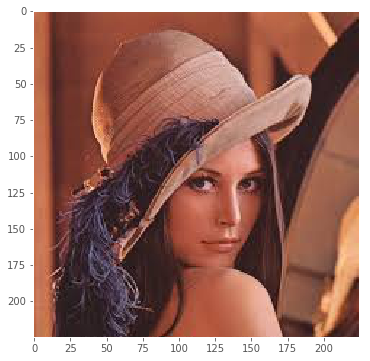

In [4]:
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

In [5]:
lena.shape

(225, 225, 3)

In [6]:
img_data = lena / 255.0 
img_data = img_data.reshape((-1, 3))
img_data.shape

(50625, 3)

In [7]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    pixel = data[i].T
    R, G, B = pixel[0], pixel[1], pixel[2]
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

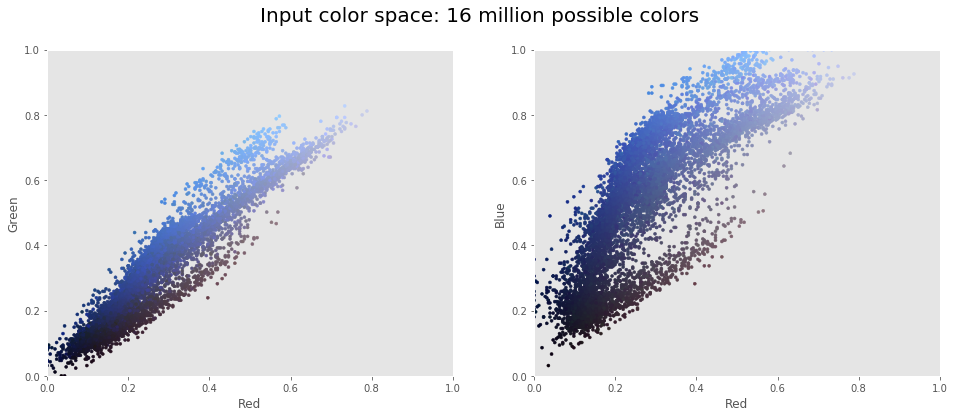

In [8]:
plot_pixels(img_data, title='Input color space: 16 million possible colors')

In [9]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(img_data.astype(np.float32),
                                          16, None, criteria, 10, flags)

In [10]:
centers

array([[0.29973754, 0.31500012, 0.48251548],
       [0.27192295, 0.3561569 , 0.6427686 ],
       [0.17865284, 0.20933454, 0.41286203],
       [0.39422086, 0.62827665, 0.9422085 ],
       [0.34117648, 0.5882353 , 0.9019608 ],
       [0.4299696 , 0.6206112 , 0.9116334 ],
       [0.06039202, 0.07102439, 0.1840712 ],
       [0.5589878 , 0.6313886 , 0.83993536],
       [0.37320262, 0.5457517 , 0.88888896],
       [0.35686275, 0.57385623, 0.88954246],
       [0.47058824, 0.48235294, 0.5921569 ],
       [0.3434641 , 0.5748366 , 0.8862745 ],
       [0.13815609, 0.12984112, 0.21053818],
       [0.3752504 , 0.47029912, 0.75687987],
       [0.31909946, 0.5482934 , 0.8737837 ],
       [0.40409693, 0.5806214 , 0.8547557 ]], dtype=float32)

In [11]:
new_colors = centers[labels].reshape((-1, 3))

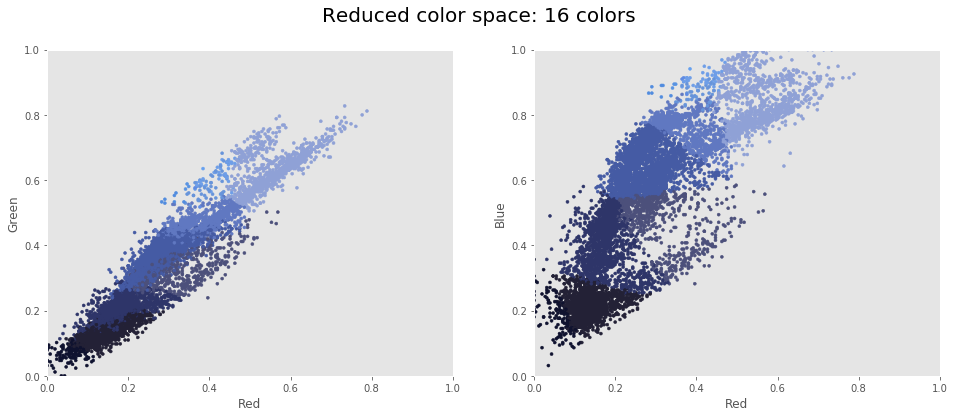

In [12]:
plot_pixels(img_data, colors=new_colors, title="Reduced color space: 16 colors")

In [13]:
lena_recolored = new_colors.reshape(lena.shape)

Text(0.5,1,'16-color image')

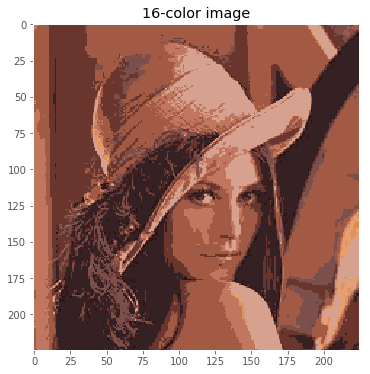

In [14]:
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(lena_recolored, cv2.COLOR_BGR2RGB));
plt.title('16-color image')